<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Visualisierungen in Python 4</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

# Ein Beispiel

Wählen Sie eines der folgenden Datasets. Verwenden Sie bitte die Versionen, die auf Eduvidual bereitgestellt sind! (Die Links sind als Informationsquelle und als Referenzangabe angedacht)
* Breast Cancer `breast_cancer.csv` (verwendet von https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* Diabetes `diabetes.csv` (verwendet von https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* Heart Disease `heart.csv` (verwendet von https://archive.ics.uci.edu/dataset/45/heart+disease)
* Insurance `insurance.csv` (verwendet von https://www.kaggle.com/datasets/owaiskhan9654/health-insurance-lead-prediction-raw-data)
* Kidney Disease `kidney.csv` (verwendet https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)
* Secondary Mushroom `mushroom.csv` (verwendet von https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset)
* Stroke Prediction `stroke.csv` (verwendet https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Bearbeiten Sie dabei insbesondere folgende Punkte (wählen Sie aber auch weitere Schritte, welche Sie für sinnvoll halten, basierend auf den besprochenen Möglichkeiten der letzten Stunden):
* Geben Sie erneut infos über das Dataset. Was ist das Ziel dieses Datasets (i.e. was ist das Label) und was ist gegeben?
* Versuchen Sie mit Hilfe von Visualisierungsmethoden interessante Zusammenhänge zwischen den Daten und den Label herauszufinden.
* Verwenden Sie, wenn notwendig auch geeignete Statistiken und wenden Sie geignetes Preprocessing an!
* Zeigen Sie auch interessante Phänomene der Daten (falls existent), die durch Visualisierungen sichtbar werden

Allgemein soll das Dataset so bearbeitet werden, dass wir möglichst viele Infos über die Daten erhalten. 

Dokumentieren Sie sämtliche Ergebnisse, indem Sie auch diese Zellen im Notebook belassen, welche keine zufriedenstellenden Ergebnisse liefern.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Daten laden (Cars)

path = os.path.join("..", "..", "_data", "cars.csv")
cars = pd.read_csv(path, decimal=".", sep=",", header=0, index_col=False)
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ziel des Datasets
Das Ziel des Car-Datasets ist die Analyse der Zusammenhänge des Autopreises (price) -> Label, mit den anderen Features und generelle Analyse. Gegeben sind verschiedene Merkmale der Autos wie CarName, fueltype, enginesize, horsepower, citympg, und weitere technische Spezifikationen.

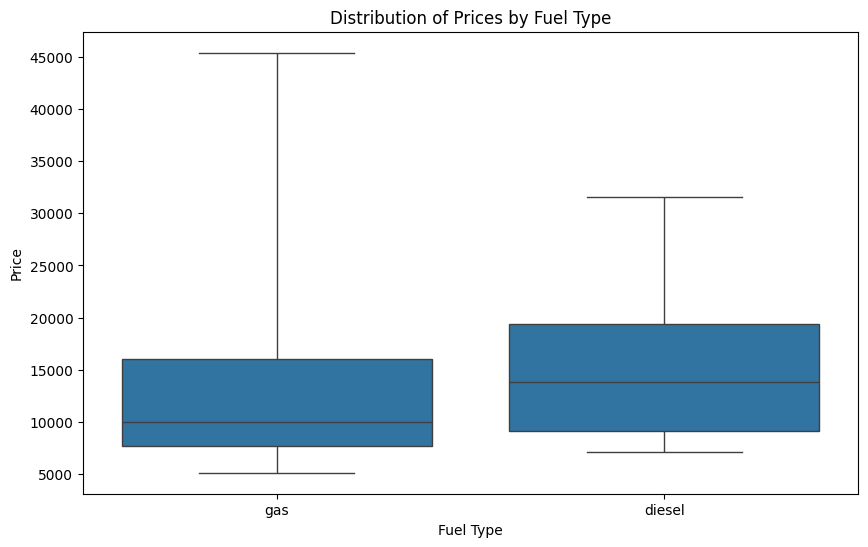

In [4]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=cars, whis=(0,100))
plt.title('Distribution of Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

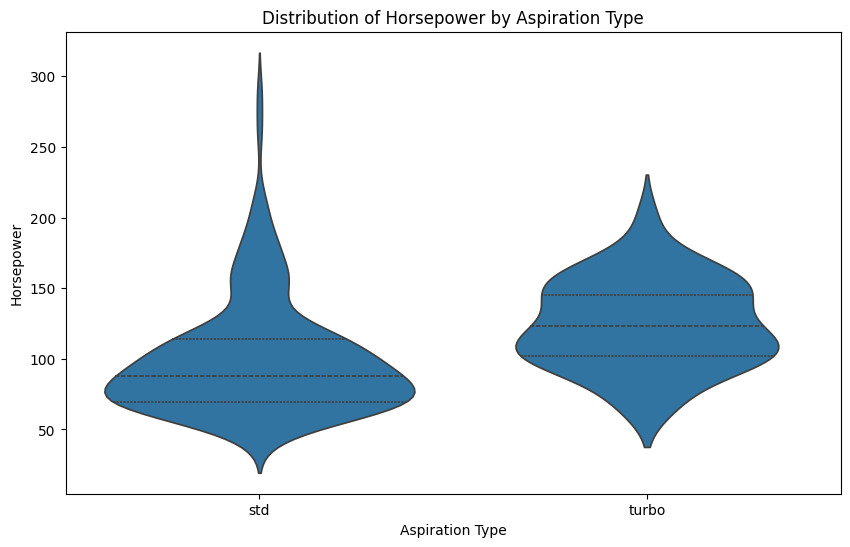

In [5]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='aspiration', y='horsepower', data=cars, inner='quart')
plt.title('Distribution of Horsepower by Aspiration Type')
plt.xlabel('Aspiration Type')
plt.ylabel('Horsepower')
plt.show()

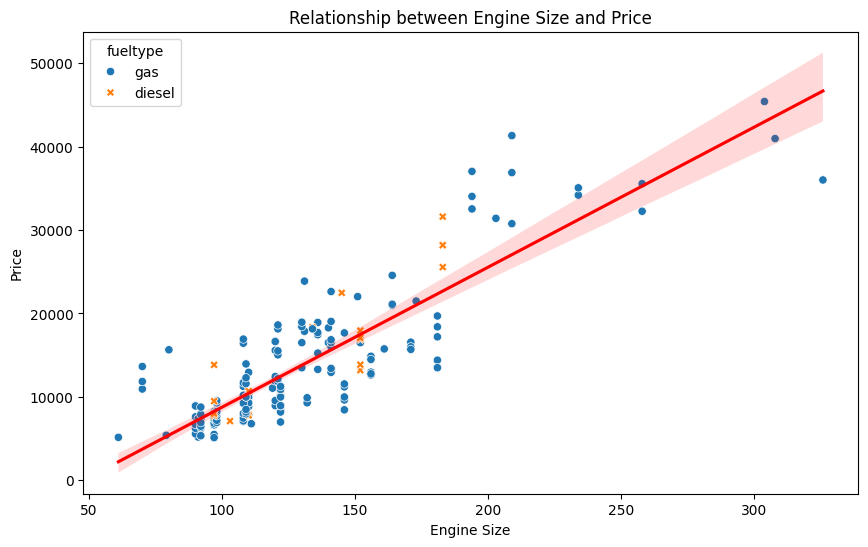

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=cars, hue='fueltype', style='fueltype')
sns.regplot(x='enginesize', y='price', data=cars, scatter=False, color='red')
plt.title('Relationship between Engine Size and Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

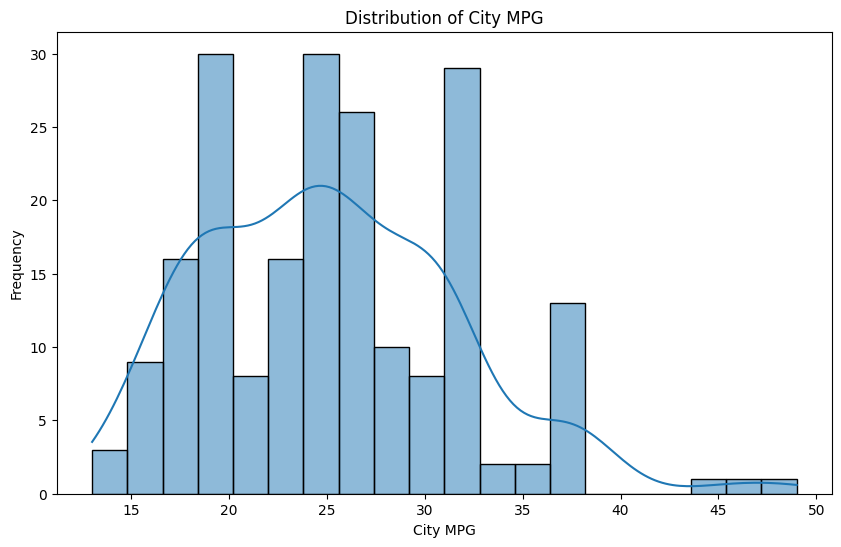

In [7]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(cars['citympg'], bins=20, kde=True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()

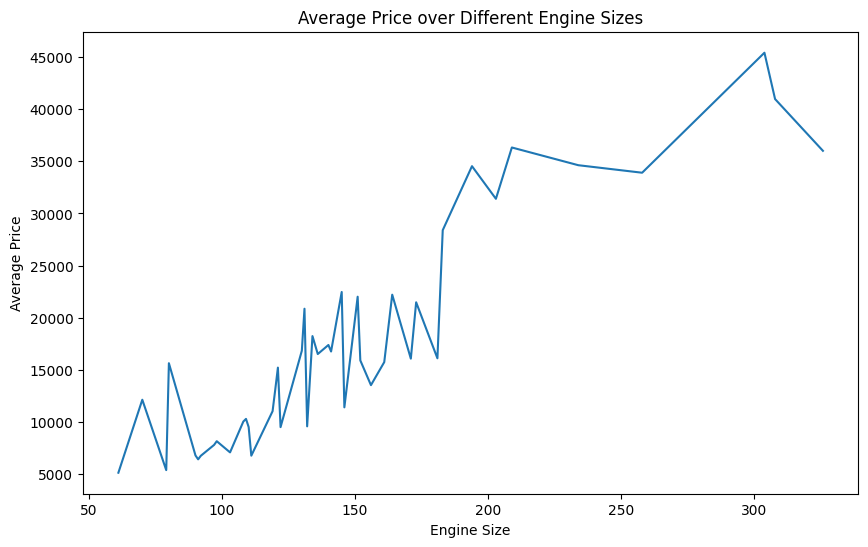

In [8]:
# Calculate average price by engine size
avg_price_by_engine = cars.groupby('enginesize')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='enginesize', y='price', data=avg_price_by_engine)
plt.title('Average Price over Different Engine Sizes')
plt.xlabel('Engine Size')
plt.ylabel('Average Price')
plt.show()

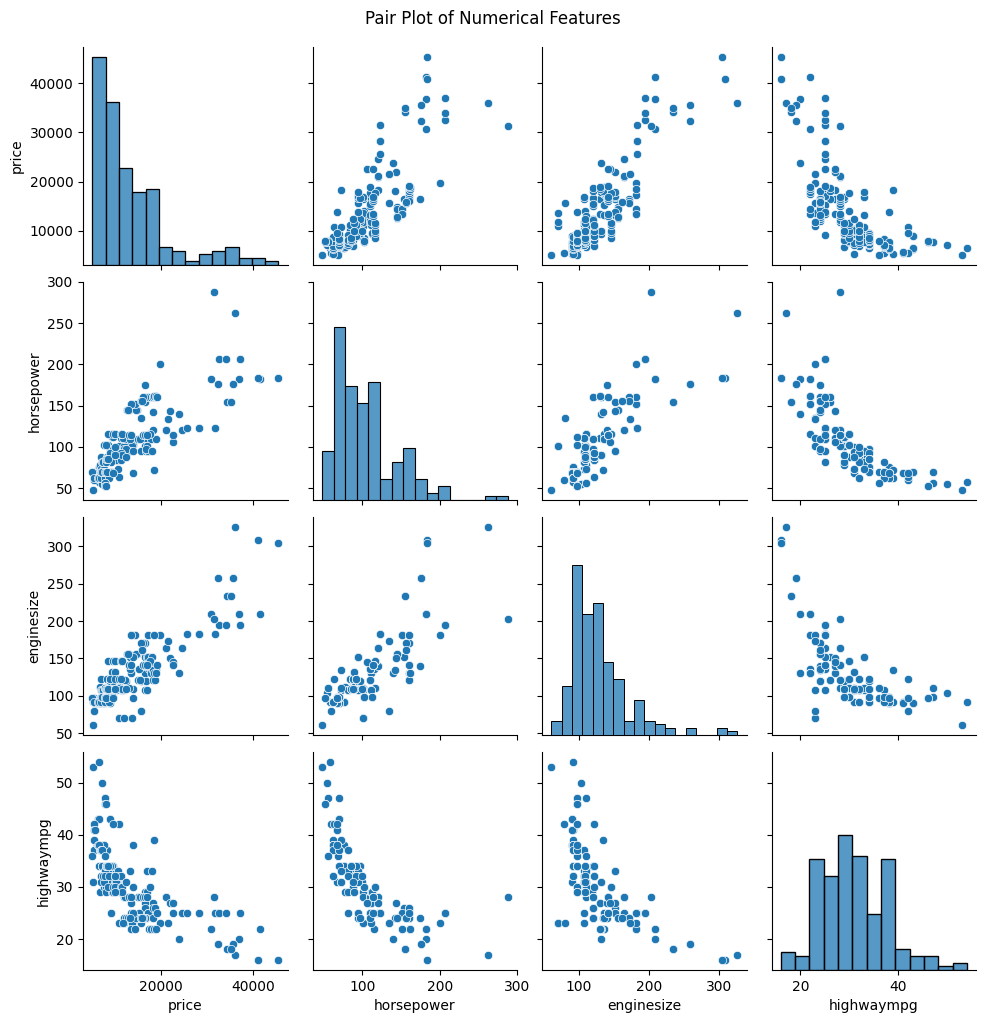

In [9]:
# Create a pair plot
sns.pairplot(cars[['price', 'horsepower', 'enginesize', 'highwaympg']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

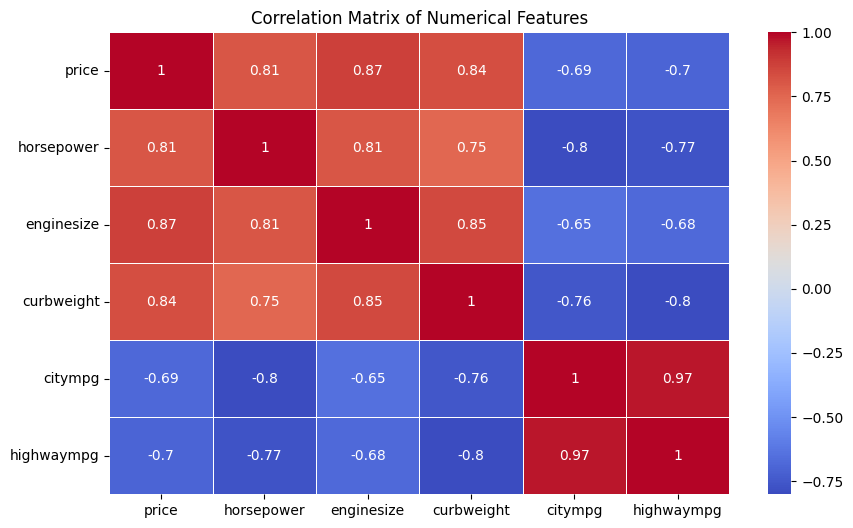

In [10]:
# Calculate the correlation matrix
corr_matrix = cars[['price', 'horsepower', 'enginesize', 'curbweight', 'citympg', 'highwaympg']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

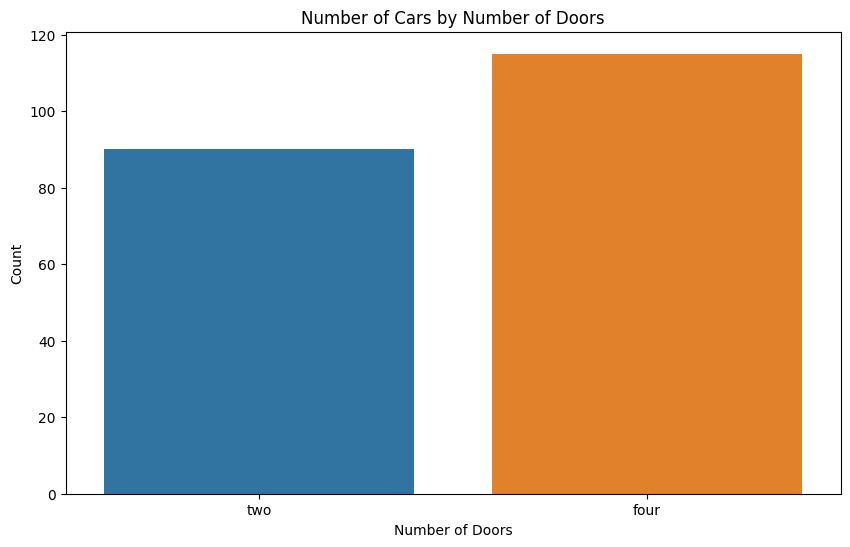

In [11]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='doornumber', data=cars, hue='doornumber')
plt.title('Number of Cars by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()

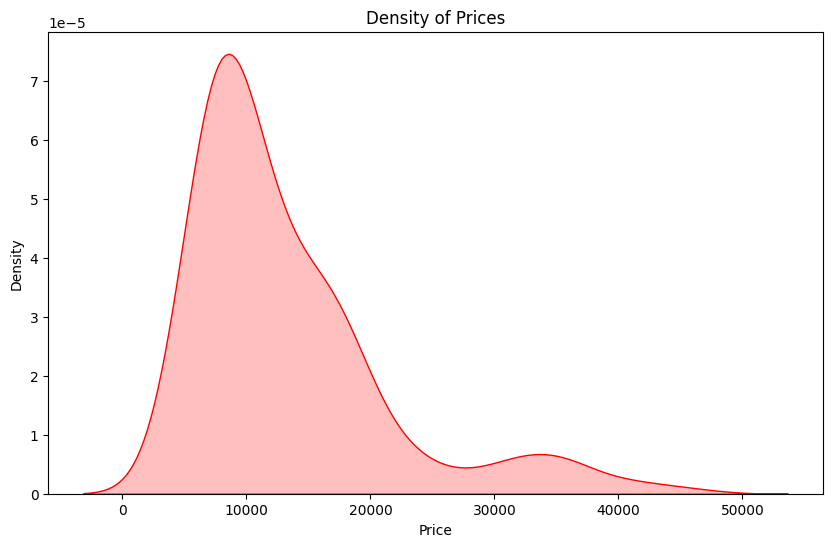

In [12]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(cars['price'], fill=True, color='r')
plt.title('Density of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

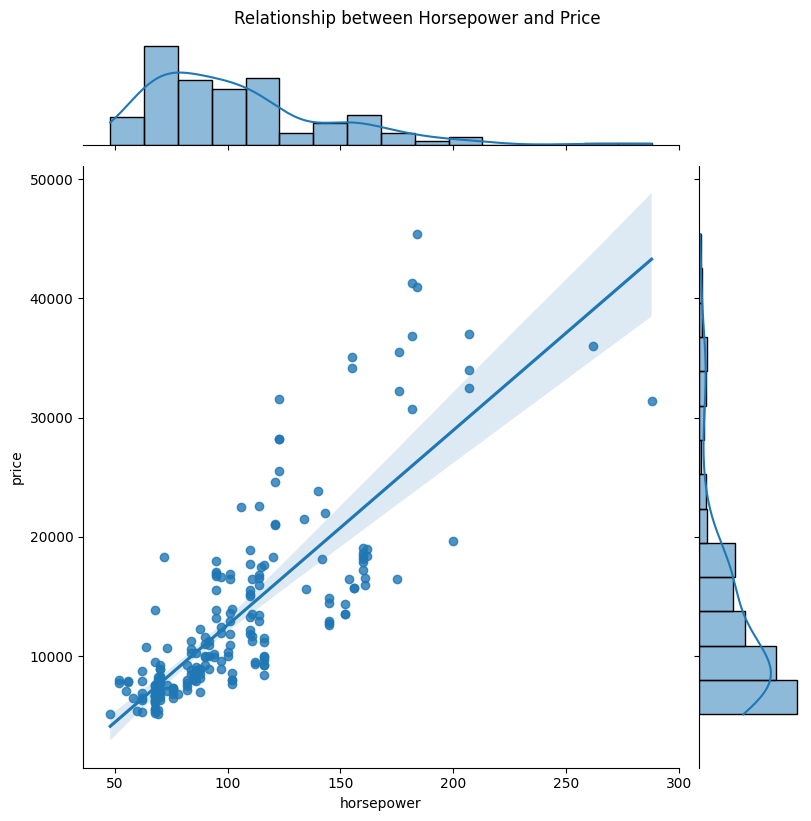

In [13]:
# Create a joint plot
sns.jointplot(x='horsepower', y='price', data=cars, kind='reg', height=8)
plt.suptitle('Relationship between Horsepower and Price', y=1.02)
plt.show()

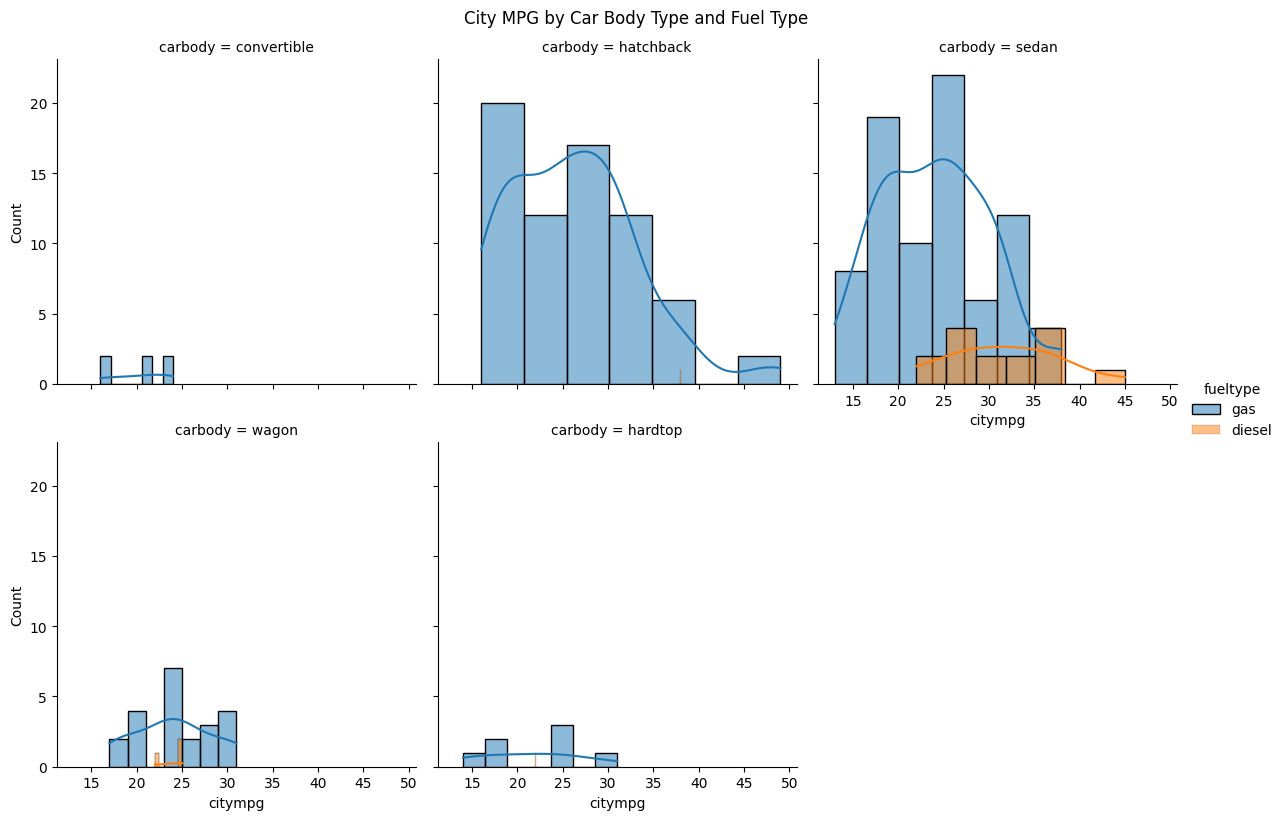

In [14]:
# Create a facet grid
g = sns.FacetGrid(cars, col='carbody', hue='fueltype', col_wrap=3, height=4)
g.map(sns.histplot, 'citympg', bins=7, kde=True)
g.add_legend()
plt.suptitle('City MPG by Car Body Type and Fuel Type', y=1.02)
plt.show()